In [54]:
import numpy as np
import matplotlib.pyplot as plt
from toolz.curried import pipe
from fext import makeio, makerandom, fmap, Random, map, compose
from typing import Tuple
import scipy.ndimage

In [55]:
def filter(x: np.ndarray) -> np.ndarray:
    return np.exp(-abs(x)) * np.cos(2 * np.pi * x)

In [56]:
@makeio
def fplot(x: np.ndarray, y: np.ndarray) -> None:
    plt.plot(x, y, color='#1a9850')
    plt.show()

io = pipe(
        np.linspace(-10.0, 10.0, 1000),
        lambda x: fplot(x, filter(x))
)

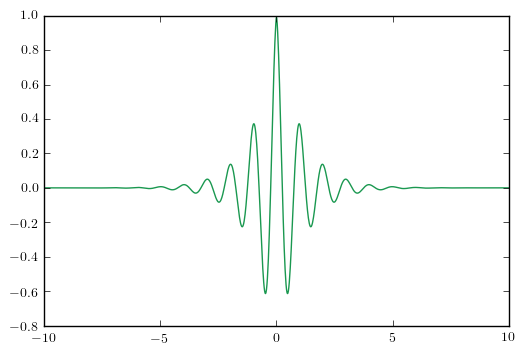

IO(None)

In [57]:
io

In [58]:
@makerandom
def get_x(n_sample: int, n_space: int) -> np.ndarray:
    np.random.seed(201)
    return np.random.random((n_sample, n_space))

In [76]:
def get_data(x0, x1, n_space, n_sample: int) -> Random[np.ndarray]:
    def conv(x: np.ndarray) -> np.ndarray:
        return scipy.ndimage.convolve(x, filter(np.linspace(x0, x1, n_space)), mode="wrap")
    fpure = compose(np.array, list, map(conv))
    return fmap(fpure, get_x(n_sample, n_space))

In [77]:
data = get_data(-10.0, 10.0, 1000, 50)

In [78]:
value = data._action()

In [79]:
value.shape

(50, 1000)

In [80]:
print data.shape

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-80-d73eb330053c>, line 1)